In [1]:
!apt-get install lshw
!lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpci3 pciutils usbutils
The following NEW packages will be installed:
  libpci3 lshw pciutils usbutils
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 723 kB of archives.
After this operation, 2,883 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1.1 [24.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 lshw amd64 02.18-0.1ubuntu6.18.04.2 [234 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 pciutils amd64 1:3.5.2-1ubuntu1.1 [257 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 usbutils amd64 1:007-4build1 [208 kB]
Fetched 723 kB in 2s (330 kB/s)
Selecting previously unselected package libpci3:amd64.
(Reading database ... 155047 files and directories currently installed

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD 
from keras.initializers import TruncatedNormal, Constant

num_classes = 1000
image_size = 227 
channel = 3 

def conv2d(filters, kernel_size, strides=(1, 1), padding='same', bias_init=1, **kwargs):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=bias_init)
    return Conv2D(
        filters, kernel_size, strides=strides, padding=padding,
        activation='relu', kernel_initializer=trunc, bias_initializer=cnst, **kwargs
    )   

def dense(units, activation='tanh'):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=1)
    return Dense(
        units, activation=activation,
        kernel_initializer=trunc, bias_initializer=cnst,
    )   

def AlexNet():
    model = Sequential()

    #conv1
    model.add(conv2d(96, 11, strides=(4, 4), padding='valid', bias_init=0,
        input_shape=(image_size, image_size, channel)))
    #pool1
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    #conv2
    model.add(conv2d(256, 5)) 
    #pool2
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    #conv3
    model.add(conv2d(384, 3, bias_init=0))
    #conv4
    model.add(conv2d(384, 3)) 
    #conv5
    model.add(conv2d(256, 3)) 
    #pool5
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    #fc6
    model.add(Flatten())
    model.add(dense(4096))
    model.add(Dropout(0.5))
    #fc7
    model.add(dense(4096))
    model.add(Dropout(0.5))

    #fc8
    model.add(dense(num_classes, activation='softmax'))

    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = AlexNet()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [3]:
import torch
import torch.nn as nn
 
features1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2))
 
test1 = torch.FloatTensor(1, 3, 224, 224)
print('original_version_shape = ',features1(test1).shape)
 
features2 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # change
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # change
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # change
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))  # change
 
test2 = torch.FloatTensor(1, 3, 32, 32)
print('cifar10_version_shape =',features2(test2).shape)

original_version_shape =  torch.Size([1, 256, 6, 6])
cifar10_version_shape = torch.Size([1, 256, 4, 4])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified
train_dataset =  50000
test_dataset =  10000
torch.Size([3, 32, 32])
Epoch [1/20], Loss: 0.0358, val_loss: 0.0341, val_acc: 0.1888
Epoch [2/20], Loss: 0.0298, val_loss: 0.0266, val_acc: 0.3531
Epoch [3/20], Loss: 0.0245, val_loss: 0.0231, val_acc: 0.4660
Epoch [4/20], Loss: 0.0211, val_loss: 0.0183, val_acc: 0.5713
Epoch [5/20], Loss: 0.0181, val_loss: 0.0164, val_acc: 0.6310
Epoch [6/20], Loss: 0.0157, val_loss: 0.0140, val_acc: 0.6865
Epoch [7/20], Loss: 0.0139, val_loss: 0.0132, val_acc: 0.7053
Epoch [8/20], Loss: 0.0124, val_loss: 0.0124, val_acc: 0.7259
Epoch [9/20], Loss: 0.0111, val_loss: 0.0117, val_acc: 0.7381
Epoch [10/20], Loss: 0.0099, val_loss: 0.0111, val_acc: 0.7585
Epoch [11/20], Loss: 0.0090, val_loss: 0.0109, val_acc: 0.7646
Epoch [12/20], Loss: 0.0080, val_loss: 0.0110, val_acc: 0.7633
Epoch [13/20], Loss: 0.0071, val_loss: 0.0107, val_acc: 0.7650
Epoch [14/20], Loss: 0.0064, va

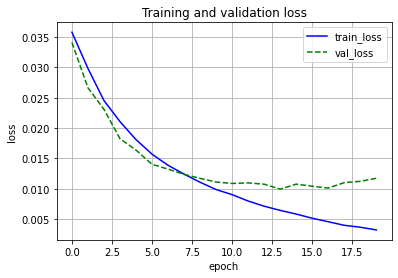

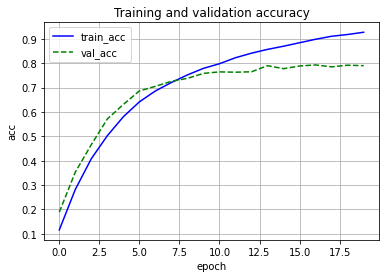

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pyplot as plt
 
# load CIFA-10 data
train_dataset = torchvision.datasets.CIFAR10(
      root='./data/',
      train=True, 
      transform=transforms.ToTensor(),
      download=True)
 
test_dataset = torchvision.datasets.CIFAR10(
      root='./data/',
      train=False, 
      transform=transforms.ToTensor(),
      download=True)
 
print ('train_dataset = ', len(train_dataset))
print ('test_dataset = ', len(test_dataset))
image, label = train_dataset[0]
print (image.size())
 
# set data loadser
train_loader = torch.utils.data.DataLoader(
      dataset=train_dataset,
      batch_size=64, 
      shuffle=True,
      num_workers=2)
 
test_loader = torch.utils.data.DataLoader(
      dataset=test_dataset,
      batch_size=64, 
      shuffle=False,
      num_workers=2)
 
# Alexnet
class AlexNet(nn.Module):
 
    def __init__(self, num_classes):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 4 * 4)
        x = self.classifier(x)
        return x
 
# select device
num_classes = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = AlexNet(num_classes).to(device)
 
# optimizing
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
 
# training
num_epochs = 20
train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
 
### training
for epoch in range(num_epochs):
    train_loss, train_acc, val_loss, val_acc = 0, 0, 0, 0
    
    # ====== train_mode ======
    net.train()
    for i, (images, labels) in enumerate(train_loader):
      images, labels = images.to(device), labels.to(device)      
      optimizer.zero_grad()
      outputs = net(images)
      loss = criterion(outputs, labels)
      train_loss += loss.item()
      train_acc += (outputs.max(1)[1] == labels).sum().item()
      loss.backward()
      optimizer.step()
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    # ====== val_mode ======
    net.eval()
    with torch.no_grad():
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)
    
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)
    
 
# plot graph
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
 
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()